## Пробуем анализировать датасет##
импортируем библиотеки и датасет

In [1440]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn
data = pd.read_csv("adult11.csv")
seaborn.set(style="darkgrid")

очищаем от пустых значений

In [1441]:
data
data.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1442]:
data = data.loc[data["workclass"] != "?"]
data = data.loc[data["occupation"] != "?"]

data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1443]:
s = data.iloc[:, [0,-1]]

In [1444]:
s

,age,salary
0,25,<=50K
1,38,<=50K
2,28,>50K
3,44,>50K
5,34,<=50K
...,...,...
48837,27,<=50K
48838,40,>50K
48839,58,<=50K
48840,22,<=50K


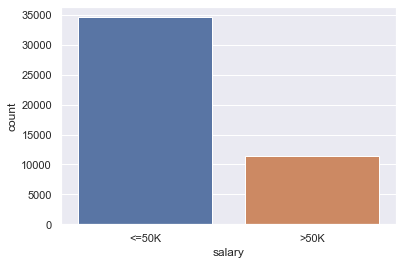

In [1445]:
a = seaborn.countplot(x = "salary", data = s)

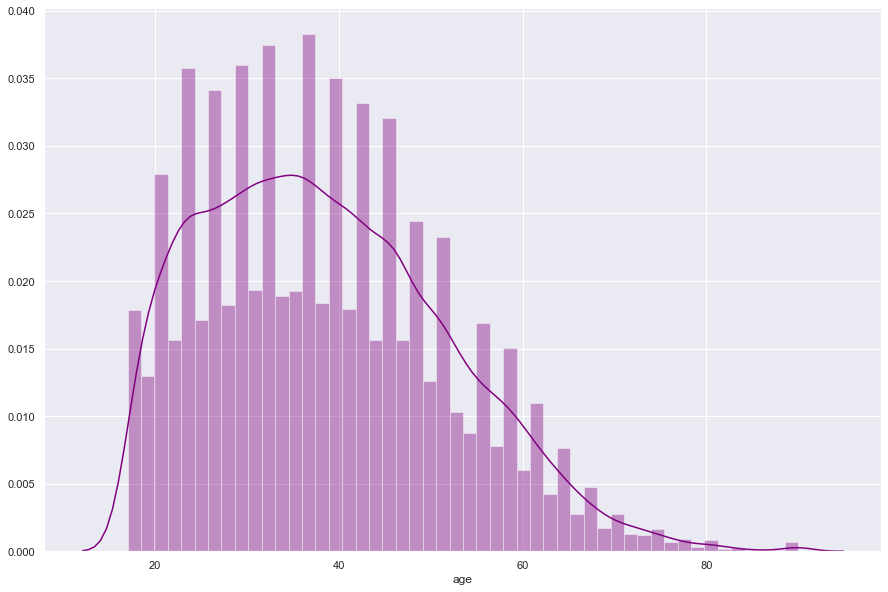

In [1446]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(data['age'], color = "purple")

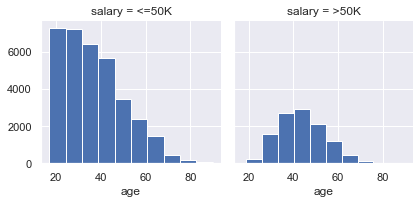

In [1447]:
g = seaborn.FacetGrid(data,col='salary')
g.map(plt.hist,'age')

по данным графикам можно сделать предположение, что чем старше человек

тем чаще его зарпллата ">50к"

и что пик трудовой активности около 35 лет

смотрим корреляцию целочисленных данных

In [1448]:
data = data.replace(to_replace=['>50K', '<=50K'], value=[1, 0])
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.075757,0.037566,0.079907,0.059441,0.102185,0.237338
fnlwgt,-0.075757,1.000000,-0.040167,-0.004246,-0.004363,-0.018325,-0.006862
education-num,0.037566,-0.040167,1.000000,0.126382,0.081463,0.145151,0.332293
capital-gain,0.079907,-0.004246,0.126382,1.000000,-0.032142,0.082977,0.221643
capital-loss,0.059441,-0.004363,0.081463,-0.032142,1.000000,0.055545,0.149405
hours-per-week,0.102185,-0.018325,0.145151,0.082977,0.055545,1.000000,0.226795
salary,0.237338,-0.006862,0.332293,0.221643,0.149405,0.226795,1.000000


строим логистическую регрессию, которая будет 

предсказывать уровень зарплаты

In [1449]:
model = LogisticRegression(solver = 'liblinear')
X = data[["education-num", "hours-per-week", "capital-gain", "age", "capital-loss"]].values
Y = data["salary"].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [1450]:
r_sq = model.score(X_train, Y_train)
r_sq

0.8058980068429914

In [1451]:
prediction = model.predict(X_test)
accuracy_score(prediction,Y_test)

0.8011295753231237

результаты уже неплохие, но можно ли

попробовать сделать их лучше?

рассмотрим типы профессии

In [1452]:
np.unique(data["occupation"].values, return_counts=True)

(array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array([5611,   15, 6112, 6086, 1490, 2072, 3022, 4923,  242, 6172,  983,
        5504, 1446, 2355], dtype=int64))

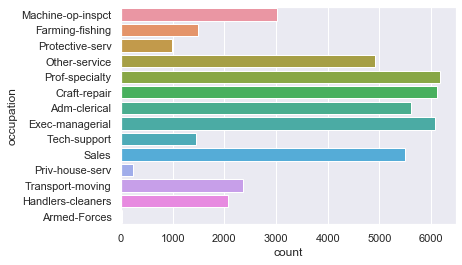

In [1453]:
m = seaborn.countplot(y = "occupation", data = data)

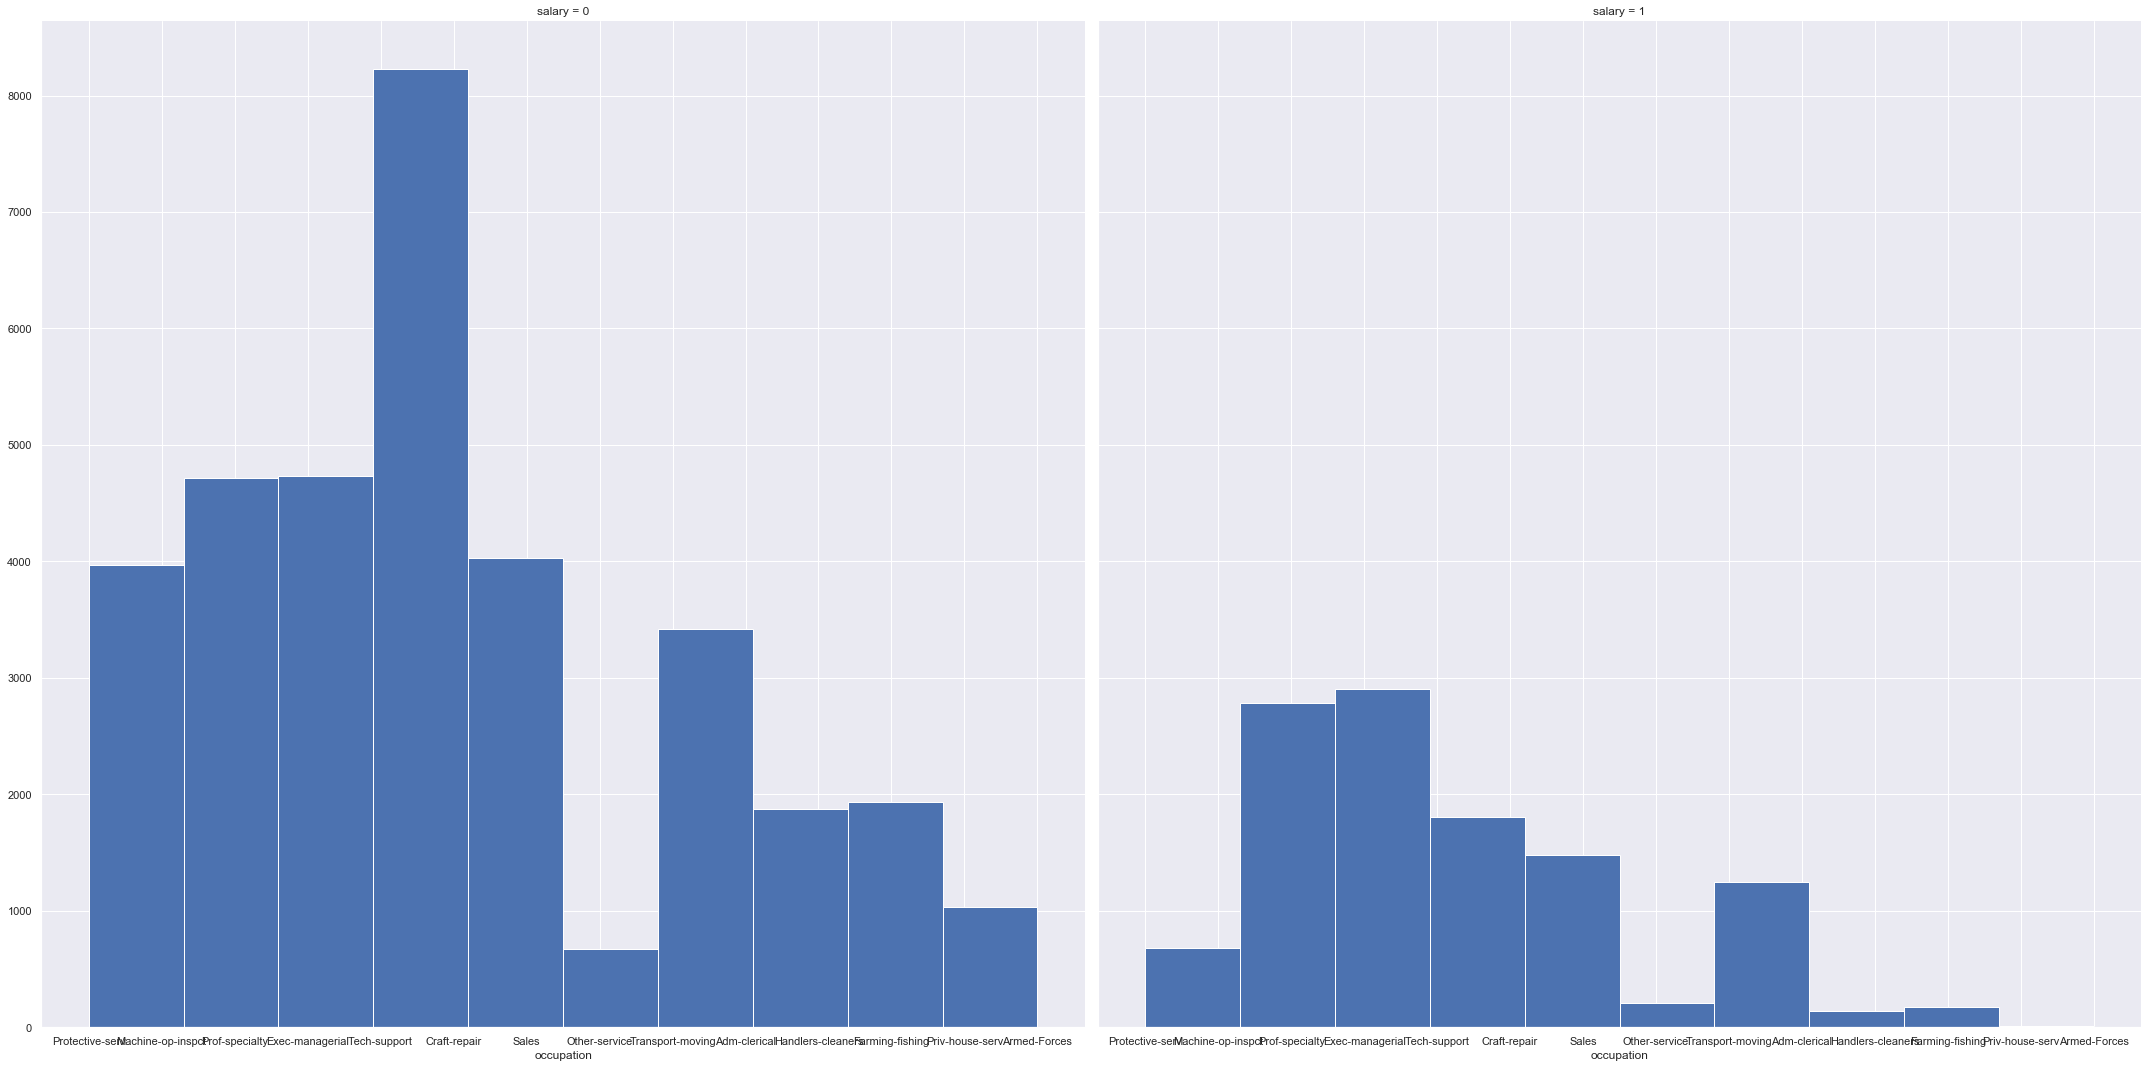

In [1454]:
g = seaborn.FacetGrid(data,col='salary', height=15)
g.map(plt.hist, 'occupation')

по данным графикам можно сделать вывод, что в соотношении "меньше 50к"

и больше "50к" самые успешные профессии - технические

In [1455]:
enc = OneHotEncoder(handle_unknown='ignore')
occupation_types = ('Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving')
data = pd.get_dummies(data, columns=["occupation"], prefix=[""] )
data

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,gender,capital-gain,...,_Farming-fishing,_Handlers-cleaners,_Machine-op-inspct,_Other-service,_Priv-house-serv,_Prof-specialty,_Protective-serv,_Sales,_Tech-support,_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,0,0,1,0,0,0,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,0,0,1,0,0,0,0,0,0,0
5,34,Private,198693,10th,6,Never-married,Not-in-family,White,Male,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,0,0,0,0,0,0,0,0,0,0


In [1456]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,_Adm-clerical,_Armed-Forces,_Craft-repair,...,_Farming-fishing,_Handlers-cleaners,_Machine-op-inspct,_Other-service,_Priv-house-serv,_Prof-specialty,_Protective-serv,_Sales,_Tech-support,_Transport-moving
age,1.000000,-0.075757,0.037566,0.079907,0.059441,0.102185,0.237338,-0.038476,-0.009694,0.013396,...,0.037730,-0.097043,-0.016468,-0.090363,0.026671,0.059697,0.003834,-0.032039,-0.019183,0.036838
fnlwgt,-0.075757,1.000000,-0.040167,-0.004246,-0.004363,-0.018325,-0.006862,0.007247,0.004650,0.009103,...,-0.029731,0.025209,0.008560,-0.006158,0.003224,-0.016225,0.016421,0.002369,0.001109,0.003843
education-num,0.037566,-0.040167,1.000000,0.126382,0.081463,0.145151,0.332293,-0.003093,0.003786,-0.156450,...,-0.113656,-0.136371,-0.167679,-0.181945,-0.072545,0.425795,-0.000219,0.029726,0.059431,-0.125925
capital-gain,0.079907,-0.004246,0.126382,1.000000,-0.032142,0.082977,0.221643,-0.031285,-0.001493,-0.020384,...,-0.009601,-0.023769,-0.027909,-0.040909,-0.008900,0.084593,-0.007732,0.007408,-0.010530,-0.020584
capital-loss,0.059441,-0.004363,0.081463,-0.032142,1.000000,0.055545,0.149405,-0.023191,0.001651,-0.008311,...,-0.013261,-0.021561,-0.015856,-0.040130,-0.008682,0.045146,-0.001357,0.007548,0.003878,-0.004885
hours-per-week,0.102185,-0.018325,0.145151,0.082977,0.055545,1.000000,0.226795,-0.100513,0.000979,0.043031,...,0.089370,-0.054898,-0.003747,-0.178528,-0.047958,0.043720,0.022642,-0.006110,-0.018409,0.073057
salary,0.237338,-0.006862,0.332293,0.221643,0.149405,0.226795,1.000000,-0.095965,0.003562,-0.019794,...,-0.055902,-0.091240,-0.076729,-0.165595,-0.039676,0.184886,0.022298,0.016945,0.017649,-0.023590
_Adm-clerical,-0.038476,0.007247,-0.003093,-0.031285,-0.023191,-0.100513,-0.095965,1.000000,-0.006727,-0.145781,...,-0.068142,-0.080886,-0.098757,-0.128930,-0.027085,-0.146605,-0.055035,-0.137299,-0.067095,-0.086512
_Armed-Forces,-0.009694,0.004650,0.003786,-0.001493,0.001651,0.000979,0.003562,-0.006727,1.000000,-0.007064,...,-0.003302,-0.003920,-0.004786,-0.006248,-0.001313,-0.007104,-0.002667,-0.006653,-0.003251,-0.004192
_Craft-repair,0.013396,0.009103,-0.156450,-0.020384,-0.008311,0.043031,-0.019794,-0.145781,-0.007064,1.000000,...,-0.071564,-0.084948,-0.103717,-0.135404,-0.028445,-0.153968,-0.057799,-0.144194,-0.070465,-0.090856


создаем новую модель,

которая будет учитывать выбор профессии

точность стала хоть немного, но выше

In [1457]:
model2 = LogisticRegression(solver = 'liblinear')
X2 = data[["education-num", "hours-per-week", "capital-gain", "age", "capital-loss", 
         '_Adm-clerical', '_Armed-Forces', '_Craft-repair',
       '_Exec-managerial', '_Farming-fishing', '_Handlers-cleaners',
       '_Machine-op-inspct', '_Other-service', '_Priv-house-serv',
       '_Prof-specialty', '_Protective-serv', '_Sales', '_Tech-support',
       '_Transport-moving']].values
Y2 = data["salary"].values
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size = 0.2)
model2.fit(X2_train,Y2_train)

LogisticRegression(solver='liblinear')

In [1458]:
r_sq2 = model2.score(X2_train, Y2_train)
r_sq2

0.8159181013414435

In [1459]:
prediction2 = model2.predict(X2_test)
accuracy_score(prediction2,Y2_test)

0.8031932225480612